In [6]:
import neurom as nm
from neurom import viewer
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
#sys.path[0] = str(Path(sys.path[0]).parent)
from neurom.io import swc
from neurom import morphmath, stats
print(sys.path[6])

/home/alexf/NeuroM


# Reading in Abnormal SWC data (Missing soma and non-standard labels)

In [9]:
path1 = "../test_data/swc/Neuron.swc"
path2 = "../test_data/swc/Single_apical_no_soma.swc"
path3 = "../test_data/swc/custom_type.swc"

## Standard Neuron

SWC in custom format, reading > 4 as undefined


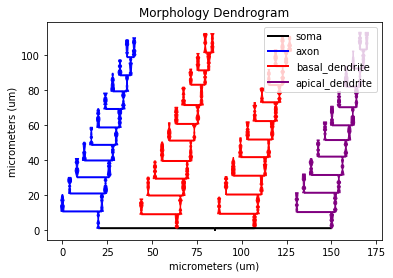

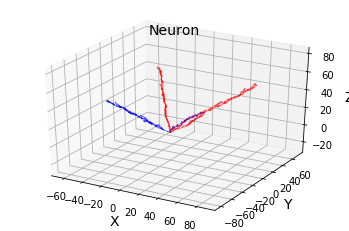

In [8]:
gt_test = nm.load_neuron(path1)
viewer.draw(gt_test, mode = 'dendrogram')
viewer.draw(gt_test, mode = '3d')
plt.show()

# Neurons with Soma removed

In [14]:
""" Raises SomaError since there is no soma in this neuron by design"""
# no_soma = nm.load_neuron(path2)

## Neuron with custom labels (Does not include 1-4)

No soma found, setting soma at first row


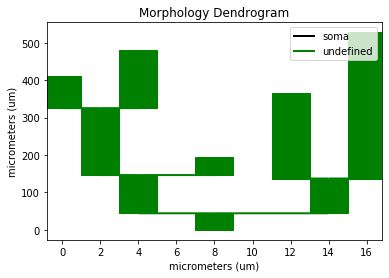

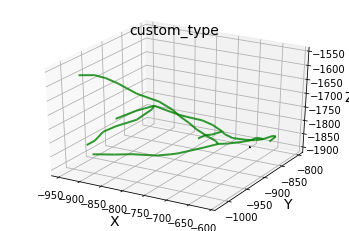

In [16]:
# Loads in custom type neuron with no soma correctly 
custom = nm.load_neuron(path3)
viewer.draw(custom, mode = 'dendrogram', output_path = 'NeuroM/figures')
viewer.draw(custom, mode = '3d', output_path = 'NeuroM/figures')
plt.show()

# Stats on Custom Type Neurons

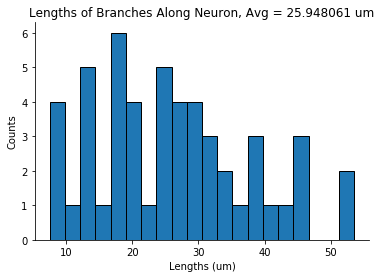

In [46]:
# Get lengths of each segment/branch to use as statistic
lens = nm.get('segment_lengths', custom)
ax = plt.subplot(111)
ax.hist(lens, bins = 20, edgecolor = 'black')
plt.title("Lengths of Branches Along Neuron, Avg = %f um" % np.mean(lens))
plt.xlabel("Lengths (um)")
plt.ylabel("Counts")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

6.666666666666667


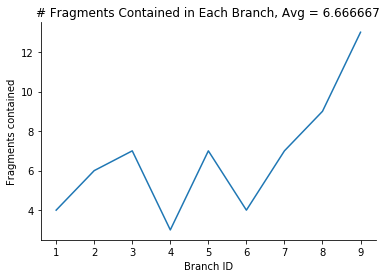

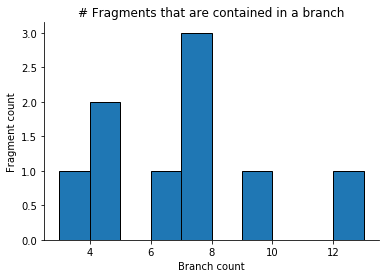

In [64]:
frags_list = []
for i in range(1,len(custom.sections)):
    num_pts = len(custom.sections[i].points)
    frags_list.append(num_pts)
ax1 = plt.subplot(111)

print(np.mean(frags_list))
ax1.plot(range(1,len(custom.sections)),frags_list)
plt.xlabel("Branch ID")
plt.ylabel("Fragments contained")
plt.title("# Fragments Contained in Each Branch, Avg = %f" % np.mean(frags_list))


ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
plt.show()

ax2 = plt.subplot(111)
plt.hist(frags_list, bins = 10, edgecolor = 'black')
plt.title("# Fragments that are contained in a branch")
plt.ylabel("Fragment count")
plt.xlabel("Branch count")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
plt.show()

## Morphology Math 

In [22]:
morphmath.path_distance(custom.points[:,:3])

1942.2627330786902

In [42]:
morphmath.pca(custom.points[:,:3])

(array([12830.66863377,  3640.5713438 ,   506.78238397]),
 array([[-0.81739521, -0.39578866, -0.41858859],
        [-0.35801662, -0.2202495 ,  0.90736666],
        [ 0.45131936, -0.89153883, -0.03833197]]))

In [23]:
morphmath.principal_direction_extent(custom.points[:,:3])

array([579.83595332, 275.54640712, 100.37421887])

## Fitting data to distributions

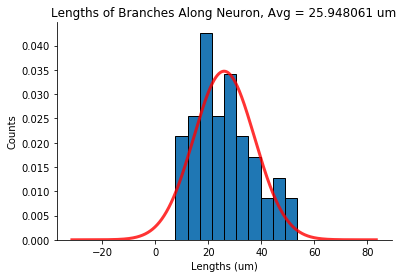

In [41]:
from scipy.stats import norm

# Fit lengths to a normal distribution 
# Stats functions all work with non-standard neuron data

p = stats.fit(lens)
mu, sigma = p.params
norm_range = np.arange(mu - 5.*sigma, mu + 5.*sigma, 0.001)
ax = plt.subplot(111)

ax.hist(lens, density = True, edgecolor = 'black')
_ = ax.plot(norm_range, norm.pdf(norm_range, mu, sigma), linewidth=3., c='r', alpha=0.8)

plt.title("Lengths of Branches Along Neuron, Avg = %f um" % np.mean(lens))
plt.xlabel("Lengths (um)")
plt.ylabel("Counts")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')